In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit_aer import Aer

# 1º: Crie o Circuito

Embora seja possível manipular estados quânticos diretamente com operadores e vetores de estado no Qiskit, por meio das classes Operator e Statevector, essa não é, em geral, a forma mais comum de se trabalhar com Qiskit ou com programação quântica.

Em vez disso, utilizamos a construção de circuitos quânticos, onde qubits são manipulados por meio de portas lógicas, registradores quânticos armazenam os estados quânticos, e registradores clássicos guardam os resultados das medições.

Essa abordagem baseada em circuitos é bastante versátil e nos permite criar trechos de código, protocolos e algoritmos de forma mais clara, modular e compatível com dispositivos físicos reais.

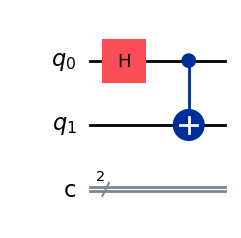

In [15]:
# Criação dos Registradores Quânticos, Registradores Clássicos e do Circuito Quântico
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

# Aplicação de Portas Quânticas
qc.h(0)
qc.cx(0, 1)

# Visualização do Circuito
qc.draw('mpl')

In [16]:
#  Visualização Matemática do Estado Quântico
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

# 2º: Execução do Código no Simulador

Depois de montar o circuito, devemos simular o circuito afim de obter o comportamento do estado quântico. Como mostrado na saída acima, se rodarmos esse circuito quântico várias em várias vezes, devemos obter 50% das vezes ket 00 e 50% das vezes ket 11. Para essa demonstração, utilizaremos o simulador Aer, que é um simulador livre de ruídos. Para os nossos propósitos, utilizaremos o simulador aer_simulator.

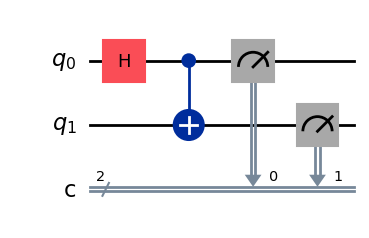

In [17]:
# Medir os qubits em registradores clássicos

qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')

In [18]:
# Exibir os simuladores disponíveis no Aer
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

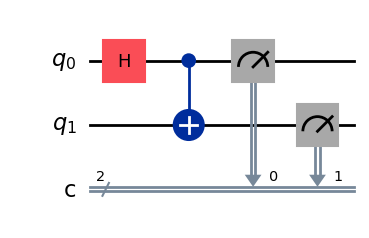

In [ ]:
# Selecionando o Simulador
simulator = Aer.get_backend('aer_simulator')

# Transpilando para as portas trabalhadas no simulador
trp_qc = transpile(backend=simulator, circuits=qc)
trp_qc.draw('mpl')

In [24]:
# Rodando 1024 vezes o circuito transpilado no simulador
run = simulator.run(circuits=trp_qc, shots=1024)

# Colhendo os resultados
results = run.result()

# Colhendo a contagem dos estados obtidos
counts = results.get_counts()
counts

{'00': 538, '11': 486}

# 3º: Visualização de Resultados

A última etapa consiste na visualização e análise dos resultados. É nesse momento que comparamos as previsões matemáticas com os resultados obtidos experimentalmente ou por simulação. Naturalmente, os resultados nem sempre coincidem exatamente com as previsões teóricas. A análise pode revelar efeitos específicos do hardware, como ruído, erros de leitura ou imperfeições nas portas quânticas, bem como limitações dos próprios simuladores. Como explicado anteriormente, o trecho de código abaixo demonstra o resultado de nosso experimento: 50% das vezes ket 00 e 50% das vezes ket 11.

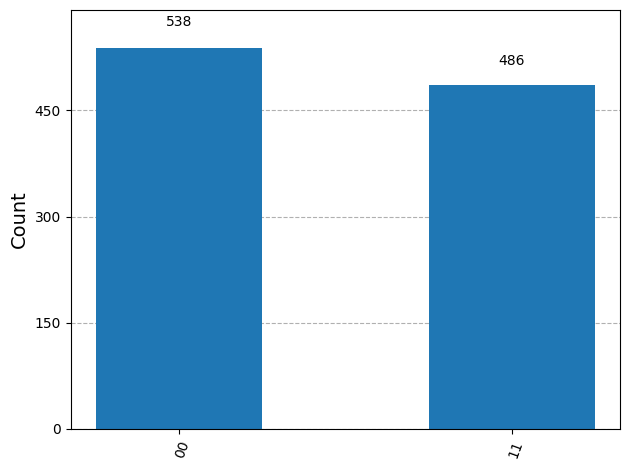

In [25]:
plot_histogram(counts)